In [1]:
from datetime import datetime

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
df = pd.read_csv("https://github.com/owid/covid-19-data/raw/master/public/data/owid-covid-data.csv")

In [4]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [5]:
COUNTRY = "Russia"

In [6]:
df = df.loc[df["location"] == COUNTRY, :]

In [7]:
df["date"] = pd.to_datetime(df["date"])

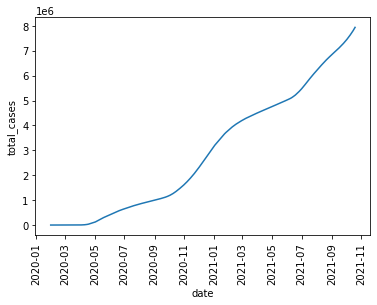

In [8]:
sns.lineplot(x="date", y="total_cases", data=df);
plt.xticks(rotation=90);

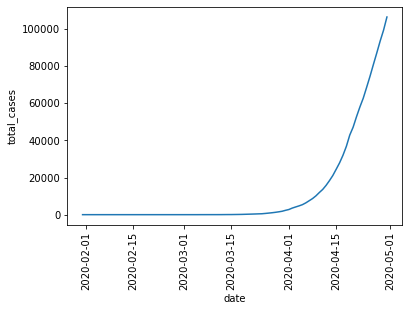

In [9]:
sns.lineplot(x="date", y="total_cases", data=df.loc[df["date"] < datetime(2020, 5, 1)]);
plt.xticks(rotation=90);

In [10]:
START_DATE = datetime(2020, 3, 15)

In [11]:
df = df.loc[df["date"] > START_DATE, :]

In [12]:
df["day_number"] = np.arange(df.shape[0]) + 1

In [13]:
train_size = int(df.shape[0] * 0.8)
train_df = df.iloc[:train_size].copy()
test_df = df.iloc[train_size:].copy()

In [14]:
train_df.shape, test_df.shape

((466, 66), (117, 66))

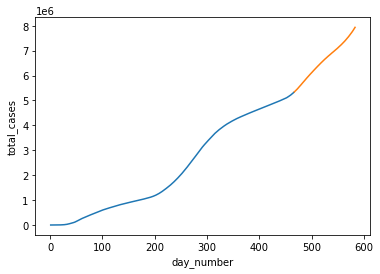

In [15]:
sns.lineplot(x="day_number", y="total_cases", data=train_df);
sns.lineplot(x="day_number", y="total_cases", data=test_df);

In [16]:
model = LinearRegression()

In [17]:
TRAIN_FEATURES = ["day_number"]

In [18]:
model.fit(train_df[TRAIN_FEATURES], train_df["total_cases"])

LinearRegression()

In [19]:
prediction = model.predict(test_df[TRAIN_FEATURES])

In [20]:
mean_squared_error(test_df["total_cases"], prediction)

349701482105.2849